In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(x_train, y_train) , (x_test, y_test ) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


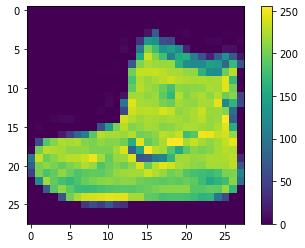

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [5]:
y_train[0]

9

In [7]:
labels = ['T-Shirt' , 'Trouser', 'Pullover' , "Dress", "Coat", "Sandals", "Shirt",
         "Sneakers", "Bag","Ankle Boots"]

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [12]:
# Normalisation

x_train, x_test = x_train / 255.0 , x_test / 255.0

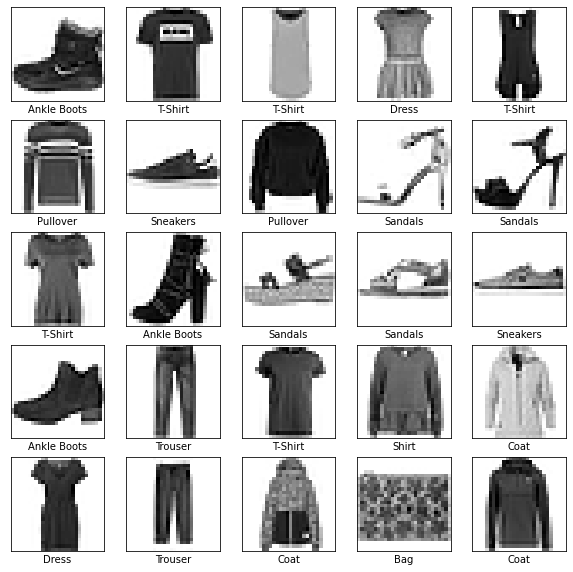

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
Total params: 110,686
Trainable params: 110,686
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


C:\Users\kashishpc\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 18s 9ms/step - loss: 1.0706 - accuracy: 0.6266 - val_loss: 0.6766 - val_accuracy: 0.7476
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6031 - accuracy: 0.7794 - val_loss: 0.5822 - val_accuracy: 0.7909
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5361 - accuracy: 0.8076 - val_loss: 0.5373 - val_accuracy: 0.8098
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4950 - accuracy: 0.8230 - val_loss: 0.5166 - val_accuracy: 0.8189
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4668 - accuracy: 0.8326 - val_loss: 0.4839 - val_accuracy: 0.8267


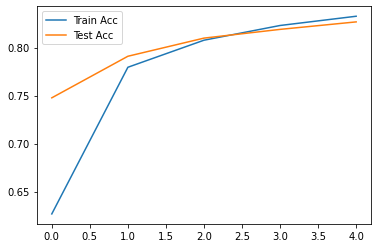

In [19]:
plt.plot(model.history.history['accuracy'], label='Train Acc')
plt.plot(model.history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.show()

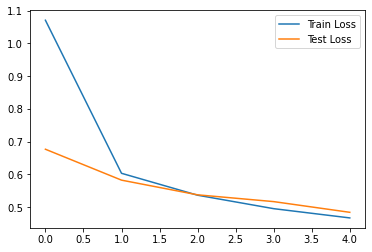

In [20]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [21]:
model.predict(x_test)[0]

array([6.1471880e-08, 3.3667016e-10, 6.1693794e-07, 4.9661742e-07,
       1.6381680e-06, 8.0802195e-02, 1.1103141e-05, 2.3404227e-01,
       1.5008067e-03, 6.8364078e-01, 7.1995299e-10, 2.0188384e-09,
       3.2305322e-10, 1.1315674e-09, 1.9221782e-10, 1.6332159e-09,
       3.2048117e-10, 7.0936729e-10, 8.8564678e-10, 1.2772619e-09,
       9.1583302e-10, 7.8332518e-10, 6.6790695e-10, 4.7459561e-09,
       3.1218247e-10, 4.2139553e-10, 7.6287698e-10, 1.5530685e-10,
       2.0688946e-09, 1.8533217e-09], dtype=float32)

In [22]:
import numpy as np

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
np.argmax(model.predict(x_test[0].reshape(1,28,28)))

9

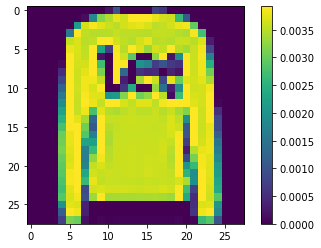

In [31]:
plt.figure()
plt.imshow(x_test[1])
plt.grid(False)
plt.colorbar()
plt.show()